# Aufgabe 3:

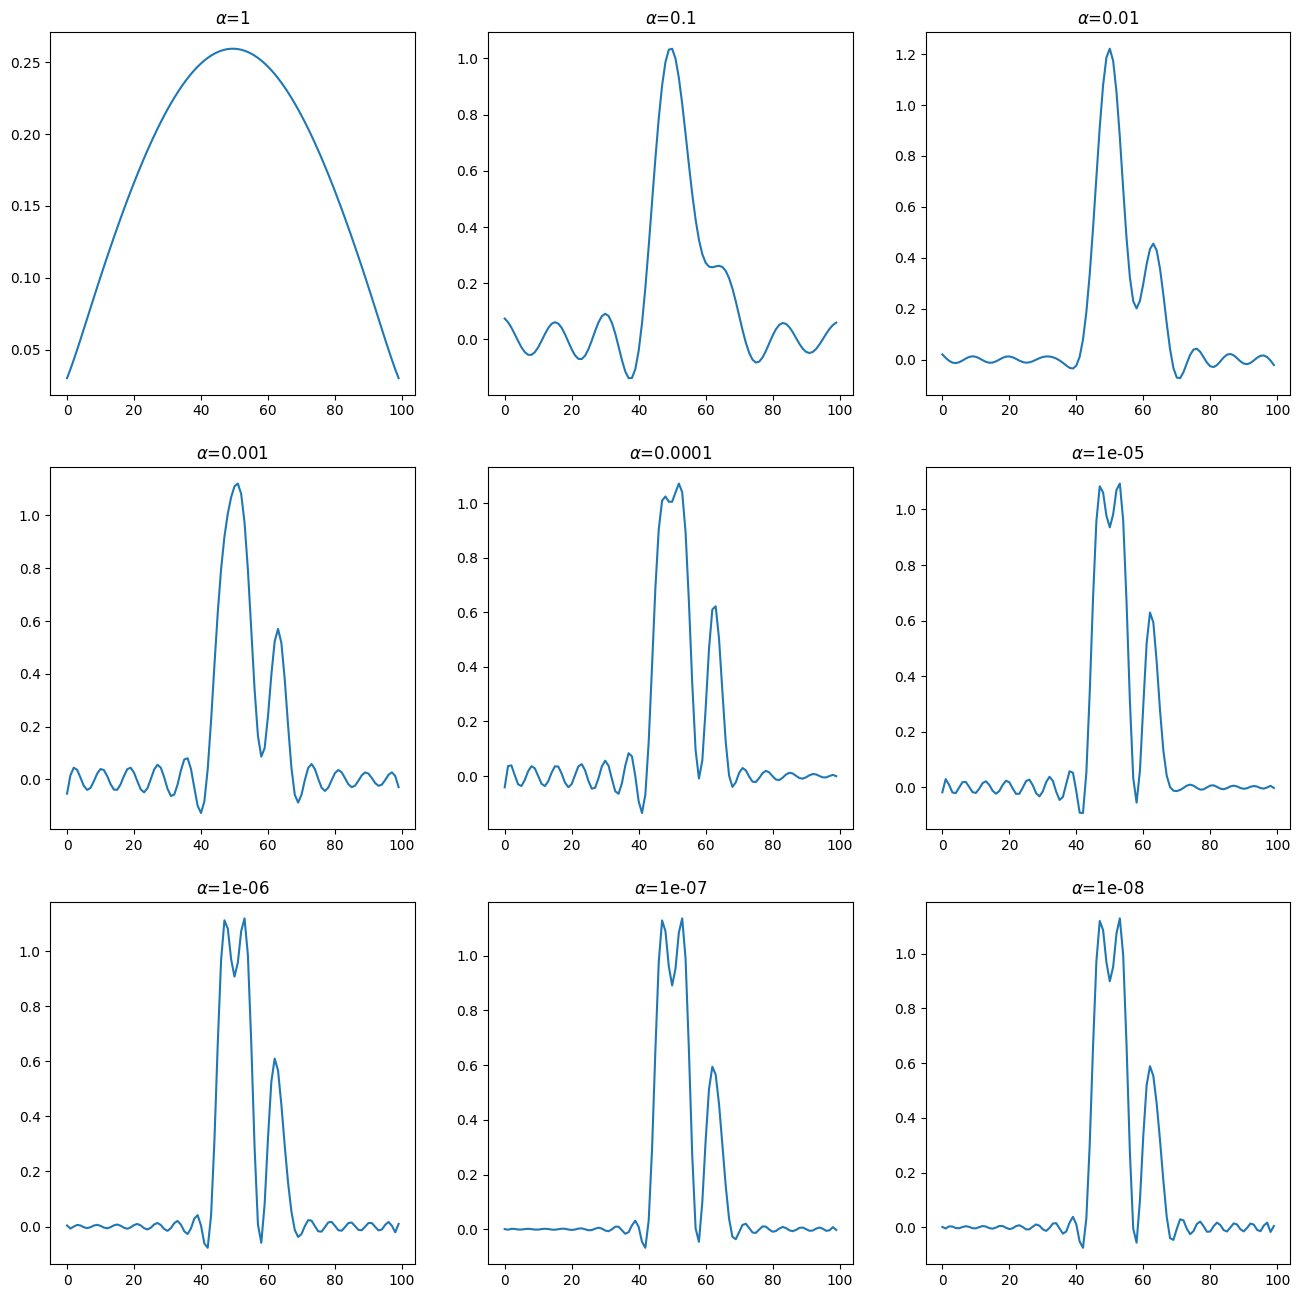

In [4]:
import numpy
import math
import matplotlib.pyplot

gamma = 0.05
n = 100
c = 1/(gamma * math.sqrt(2*math.pi))
A = numpy.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = c/n * math.exp(-((i-j)/(math.sqrt(2)*n*gamma))**2)
x = numpy.zeros((n,))
for i in range(45, 56):
    x[i] = 1
for i in range(60, 66):
    x[i] = 1/2
b = A @ x
b_stoerung = numpy.random.randn(n)/1e-6
b_ = b + b_stoerung

pseudoinverse = numpy.linalg.pinv(A)
x_ = pseudoinverse @ b_
u, s, vt = numpy.linalg.svd(A, )

def get_tsvd_index(s, alpha):
    n = s.shape[0]
    assert (s.shape == (n, ))
    for i in range(1, n):
        if s[0]/s[i] > 1/alpha:
            return i

get_tsvd_index(s, 1e-2)

fig, axs = matplotlib.pyplot.subplots(3, 3, figsize=(16, 16))
axs = axs.flatten()
for i, alpha in enumerate(10**(-k) for k in range(0, 9)):
    ind = get_tsvd_index(s, alpha)
    sigma_ = 1/s
    sigma_[ind:] = 0
    x_ = vt.T @ numpy.diag(sigma_) @ u.T @b
    axs[i].plot(x_)
    axs[i].set_title(f'$\\alpha$={alpha}')
